In [1]:
import pandas as pd
import plotly.express as exp

In [2]:
data = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

In [3]:
#Tenure Groups
bins = [0,12,36,data["tenure"].max()]
labels = ["0-12 months","13-36 months","37+ months"]
data["tenure_group"] = pd.cut(data["tenure"],bins=bins,labels=labels,include_lowest=True)

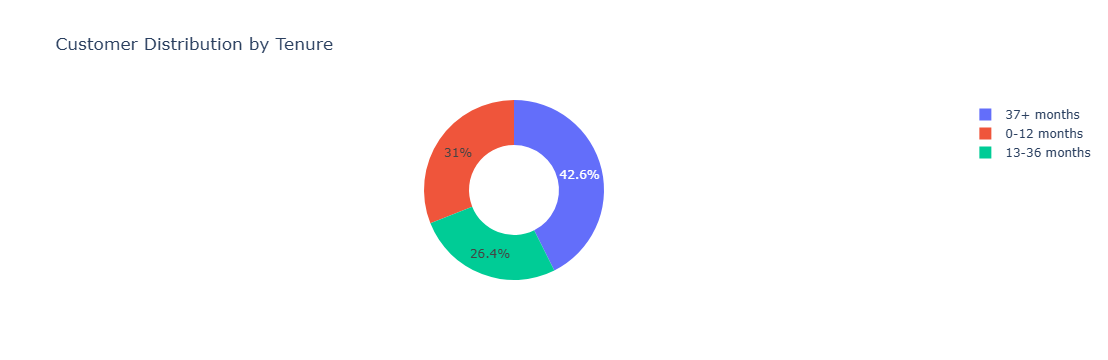

In [4]:
#pie chart for tenure_group
fig_pie = exp.pie(data,names="tenure_group",title=" Customer Distribution by Tenure",hole=0.5)
fig_pie.show()

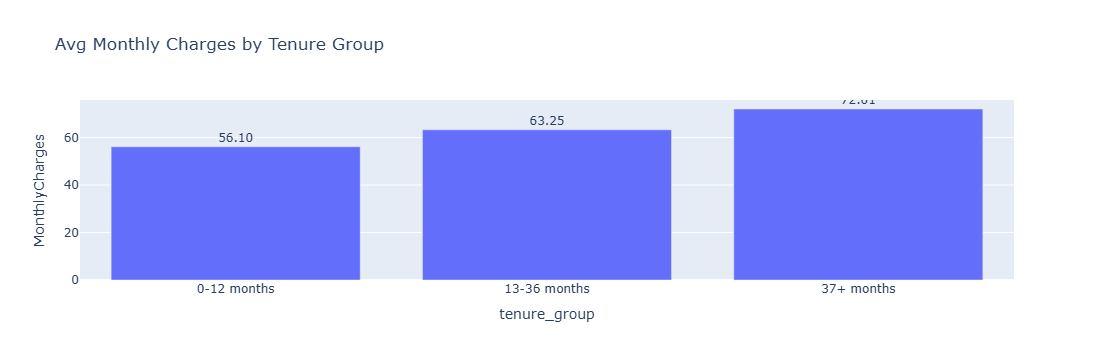

In [9]:
#Avg monthly charges by tenure group
avg_charges = data.groupby("tenure_group",observed=True)["MonthlyCharges"].mean().reset_index()
fig_bar = exp.bar(avg_charges,x="tenure_group",y="MonthlyCharges",text="MonthlyCharges",title="Avg Monthly Charges by Tenure Group")
fig_bar.update_traces(texttemplate='%{text:.2f}',textposition='outside')


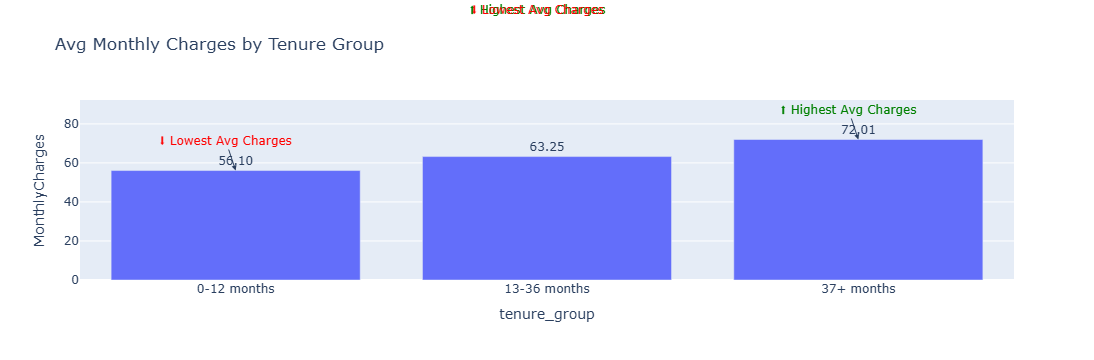

In [11]:
#Adding annotations
#Finding highest and lowest groups
max_group = avg_charges.sort_values("MonthlyCharges",ascending=False).head(1)
min_group = avg_charges.sort_values("MonthlyCharges",ascending=True).head(1)

#Add annotation for highest
fig_bar.add_annotation(
    x=max_group["tenure_group"].iloc[0],
    y=max_group["MonthlyCharges"].iloc[0],
    text="⬆ Highest Avg Charges",
    showarrow=True,
    arrowhead=2,
    font=dict(color="green", size=12)
)

fig_bar.add_annotation(
    x=min_group["tenure_group"].iloc[0],
    y=min_group["MonthlyCharges"].iloc[0],
    text="⬇ Lowest Avg Charges",
    showarrow=True,
    arrowhead=2,
    font=dict(color="red", size=12)
)

fig_bar.show()